In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Cost_Function_Error(train_data, theta_0, theta_1):
    sample_number = len(train_data)
    totalError = 0
    for i in range(sample_number):
        hyp = theta_0 * 1 + theta_1 * train_data[i, 0]
        totalError += (hyp - train_data[i, 1]) ** 2
    return totalError / (2 * len(train_data))

In [3]:
def Gradient_Descent_Update_Theta(train_data, theta_0, theta_1, lr):
    theta_0_gd = 0.0
    theta_1_gd = 0.0
    
    for i in range(len(train_data)):
        hyp = theta_0 * 1 + theta_1 * train_data[i, 0]
        theta_0_gd += (hyp - train_data[i, 1]) * 1
        theta_1_gd += (hyp - train_data[i, 1]) * train_data[i, 0]
    
    theta_0_gd = theta_0_gd / len(train_data)
    theta_1_gd = theta_1_gd / len(train_data)
    
    theta_0 = theta_0 - lr * theta_0_gd
    theta_1 = theta_1 - lr * theta_1_gd
    
    return theta_0, theta_1

In [4]:
def optimizer(train_data, theta_0, theta_1, lr, iter_num, max_error):
    error = 0.0
    global lst, last_error
    for i in range(iter_num):
        theta_0, theta_1 = Gradient_Descent_Update_Theta(train_data, theta_0, theta_1, lr)
        error = Cost_Function_Error(train_data, theta_0, theta_1)
        lst[i] = error
        if max_error > last_error - error:
            print('Error {0} small then {1}, iter {2}'.format(error, last_error, i))
            break
        last_error = error
    return theta_0, theta_1    

In [5]:
def plot_data(data, theta_0, theta_1):
    y_predicet = theta_0 * 1 + theta_1 * data[: , 0]
    plt.plot(data[:, 0], data[:, 1], 'o')   # plot data point
    plt.plot(data[:, 0], y_predicet, 'k-')  # plot predict fitting curve
    plt.show()

In [6]:
def plot_cost_function_iter(time):
    plt.plot(range(time), lst[:time], '-')
    plt.show()

In [7]:
def Linear_Regression():
    # get train data
    data = np.loadtxt('data.csv', delimiter=',')
    
    # To Some Init
    '''
        learning_rate, theta, iter_num, permit_error
    '''
    learning_rate = 0.001
    theta = np.zeros((2,1))
    theta[0] = 0.0
    theta[1] = 0.0
    iter_num = 4000
    permit_error = 1e-5
    
    print('Intital Variables:\n theta[0] = {0}\n theta[1] = {1}\n error = {2}\n'.format(
        theta[0], theta[1], Cost_Function_Error(data, theta[0], theta[1])))

    [theta_0, theta_1] = optimizer(data, theta[0], theta[1], learning_rate, iter_num, permit_error)
    
    print('End Variables:\n theta[0] = {0}\n theta[1] = {1}\n error = {2}\n'.format(
        theta_0, theta_1, Cost_Function_Error(data, theta_0, theta_1)))
    
    plot_data(data, theta_0, theta_1)

Intital Variables:
 theta[0] = [0.]
 theta[1] = [0.]
 error = [92.34182927]

Error [0.68665747] small then [0.68666747], iter 3585
End Variables:
 theta[0] = [0.81264]
 theta[1] = [1.92370112]
 error = [0.68665747]



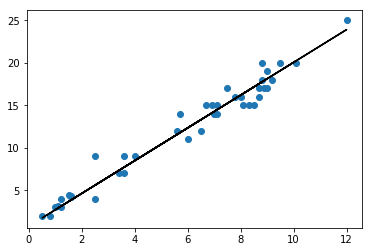

In [8]:
lst = np.zeros(4000)
last_error = 1e1000
Linear_Regression()

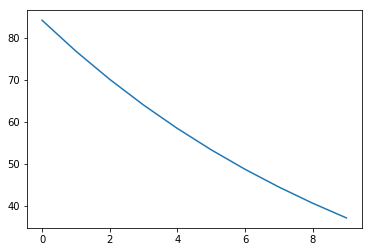

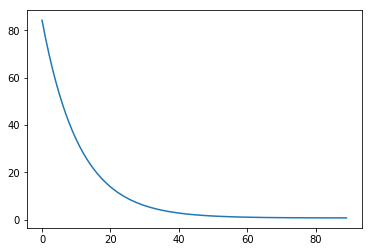

In [9]:
plot_cost_function_iter(10)
plot_cost_function_iter(90)